In [58]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [83]:
from api import Api

In [60]:
import requests

In [84]:
api=Api('192.168.56.139')

In [72]:
#list the available node
api.list_node()

'bc497ab0-6234-ccd8-74af-bf9f601048f5 31d0eaa7-455c-4231-8860-9bb592fdb3cb 26d615b4-36d8-8f91-3cc5-ebf160106c42 264294ef-a207-a834-a0bc-ec796010332f'

In [73]:
#deploy a worker in each node
api.deploy(api.list_node())

'ok'

In [81]:
network=api.get_federated_model()

In [85]:
#terminate each worker
api.terminate()

<Response [200]>

In [86]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
train_losses = []
train_counter = []
test_losses = []

In [87]:
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/tmp/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [88]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [89]:
test()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/home/tommy/snap/jupyter/common/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0587, Accuracy: 9829/10000 (98%)



In [90]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [91]:
with torch.no_grad():
  output = network(example_data)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


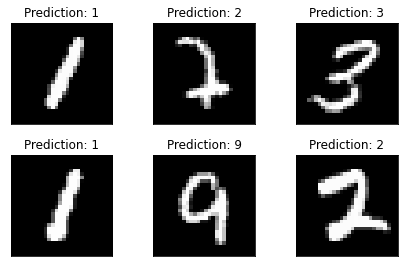

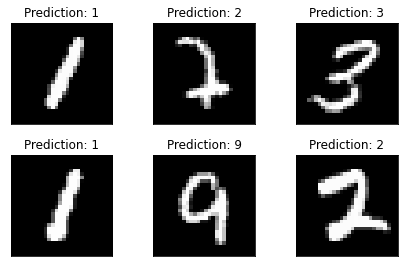

In [92]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])
fig